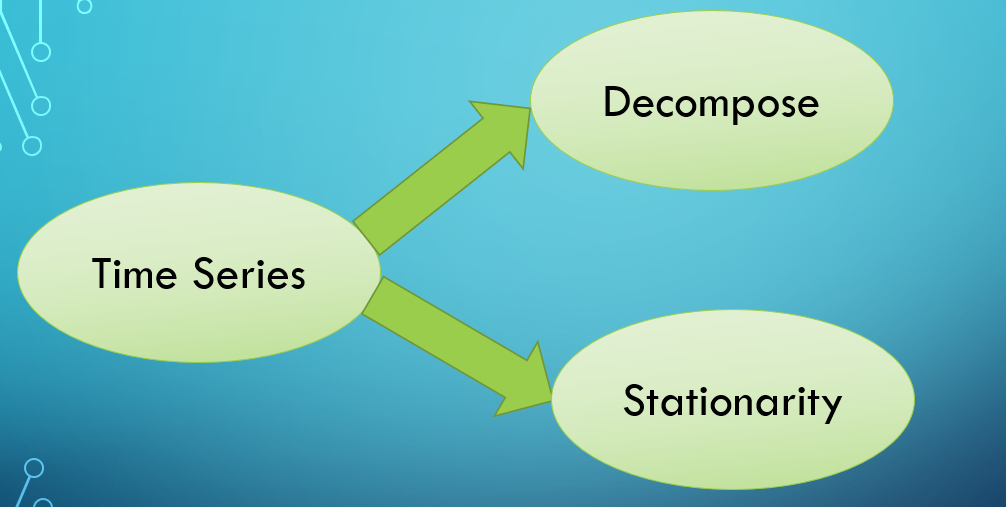

In [2]:
from IPython.display import Image
Image(filename='TimeSeriesImage.png') 

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

# Definition of additive time series:
# Value = Base Level + Trend + Seasonality + Error

# Definition of multiplicative time Series:
# Value = Base Level x Trend x Seasonality x Error

In [11]:
# Import Data -  Australian Drug Sales
data = pd.read_csv(r'C:\Users\teach\Desktop\Qualcomm content\Time_Series\train_data.csv',parse_dates=["Date"],index_col=["Date"])

In [12]:
data.head(10)

,count
Date,
2012-08-25,3
2012-08-26,3
2012-08-27,2
2012-08-28,2
2012-08-29,2
2012-08-30,3
2012-08-31,3
2012-09-01,4
2012-09-02,4


In [13]:
data.reset_index(inplace=True)

In [14]:
data

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2
...,...,...
529,2014-02-05,254
530,2014-02-06,216
531,2014-02-07,205
532,2014-02-08,159


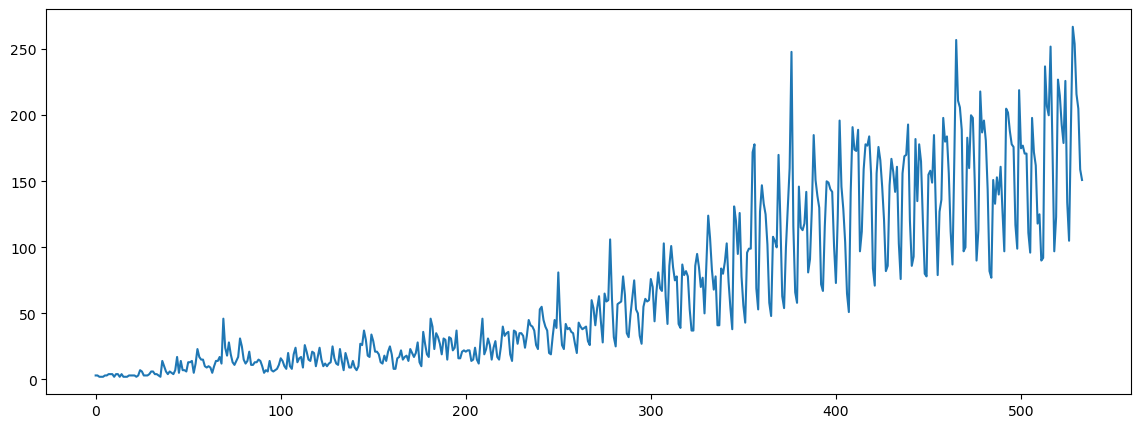

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(data['count'])
plt.show()

In [18]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(data["count"], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['count'], model='additive',period=1)

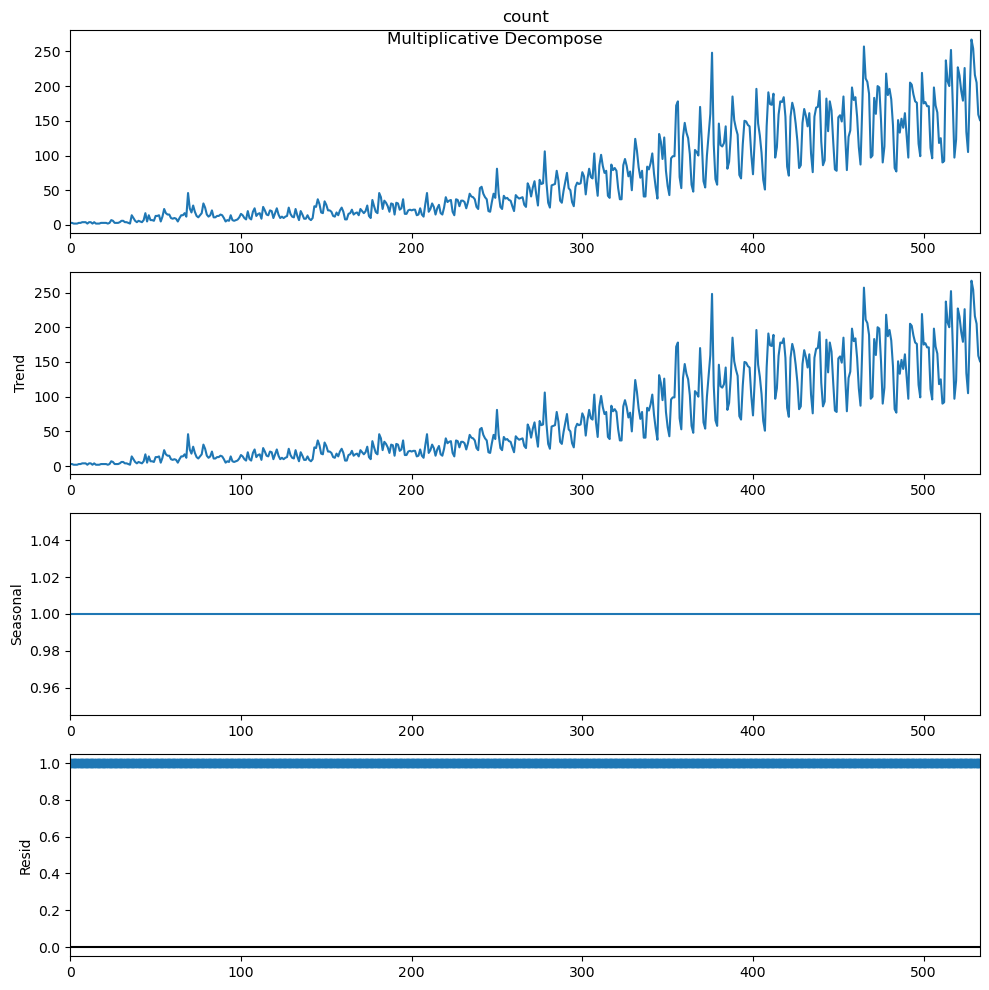

In [19]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)
plt.show()

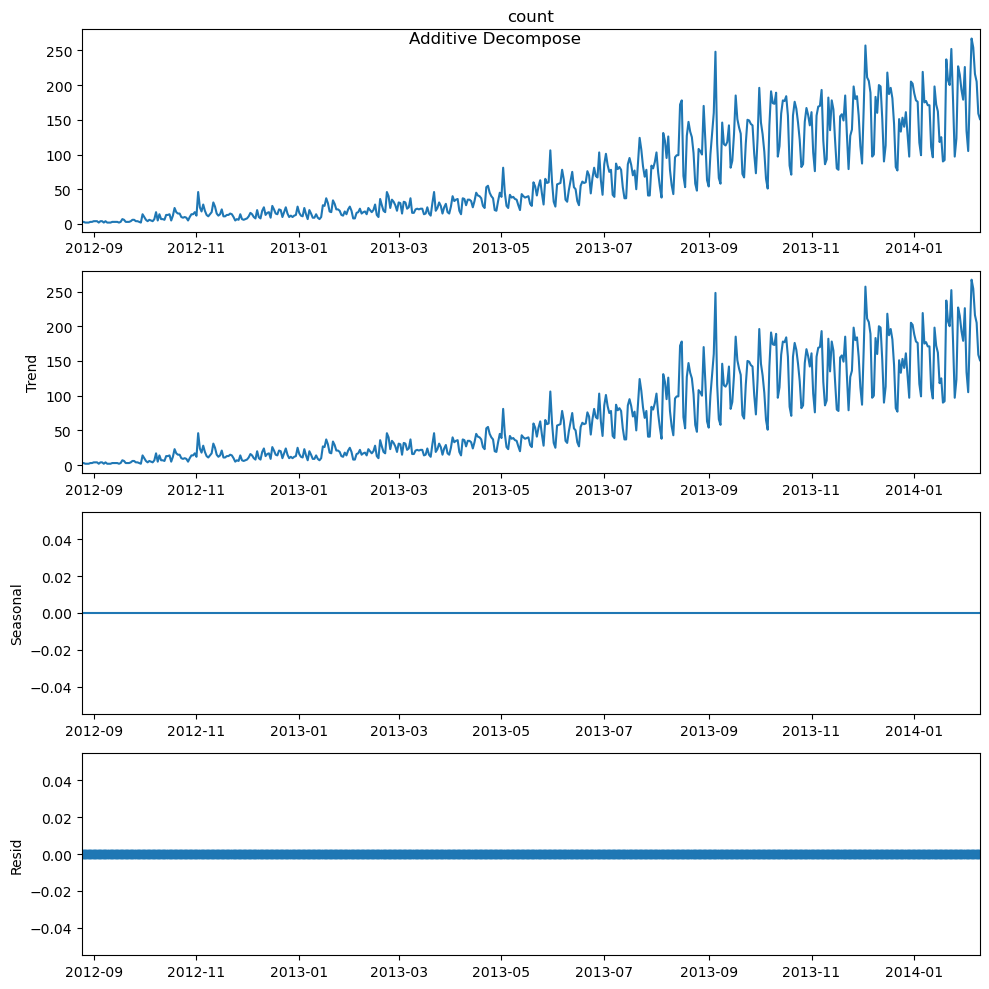

In [20]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

# Definition of stationarity - constant mean and variance

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 0.05 reject null hypothesis
adfuller_result = adfuller(data["count"].values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.182399112616948
p-value: 0.9958619929912135
Critial Values:
   1%, -3.443136494643789
Critial Values:
   5%, -2.8671794725841147
Critial Values:
   10%, -2.5697736283668187
